In [42]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as seabornInstance 
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [3]:
os.chdir('U:\\final report')

In [6]:
dt=pd.read_excel('LUSC-cheating.xlsx',index_col=0)

In [7]:
dt.shape

(501, 14889)

In [9]:
x=dt.iloc[:,0:14887].values
y=dt.iloc[:,-1].values

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


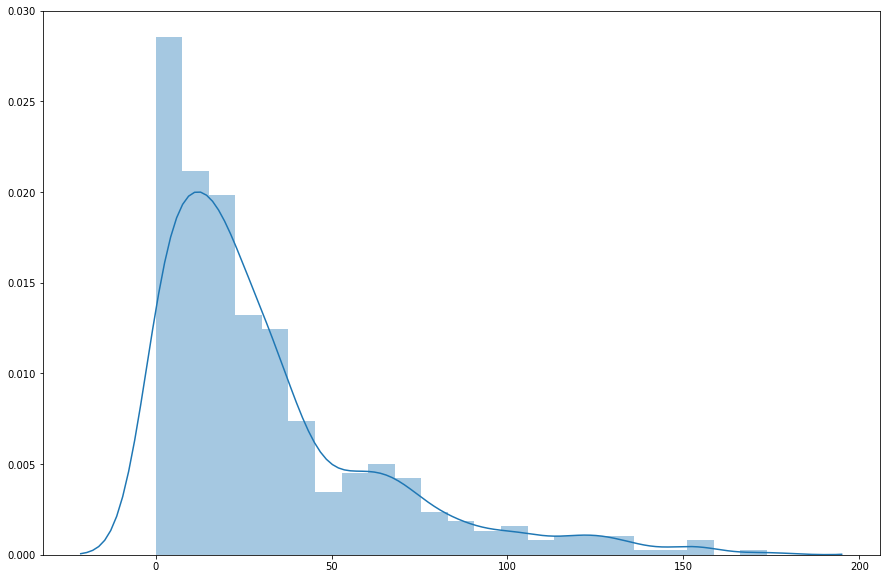

In [13]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(y)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [50]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
y_predval = regressor.predict(X_val)

In [33]:
X_test.shape

(101, 14887)

In [34]:
y_test.shape

(101,)

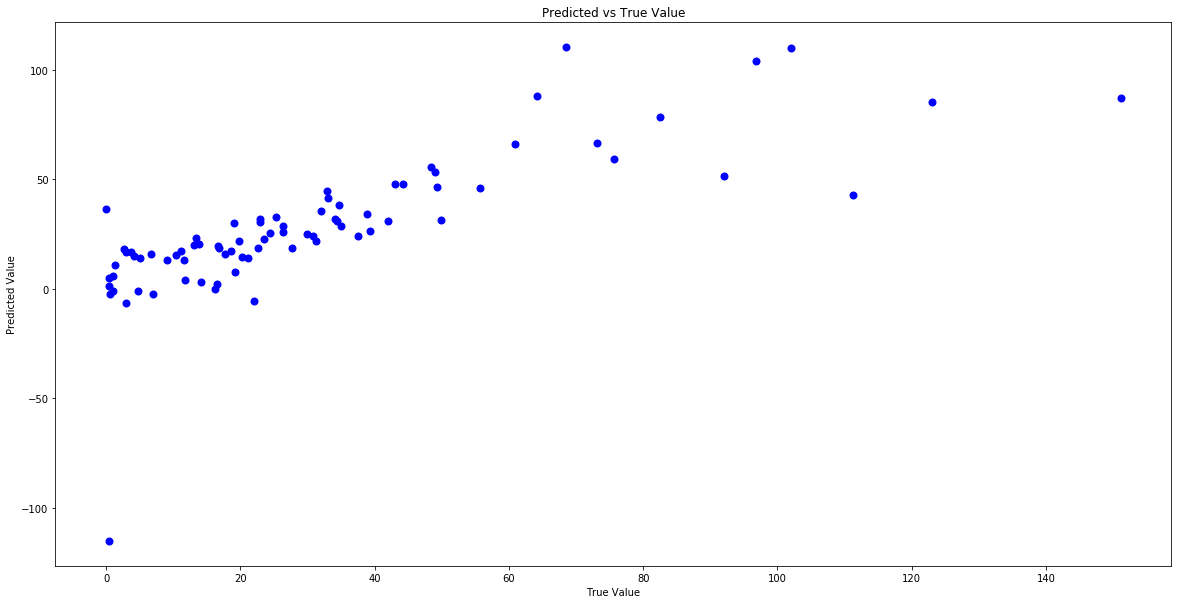

In [36]:
plt.figure(figsize=(20,10))
plt.scatter(y_val, y_pred, color='blue', linewidth=2)
plt.title('Predicted vs True Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

In [53]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))
print('Variance score: %.2f' % regressor.score(X_val, y_val))

11.928861680556683
429.92396369391906
20.734607874129644
Variance score: 0.54


In [47]:
# KFOlD
estimator = regressor
kfold = KFold(n_splits=2, random_state=0)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results)
print(results.mean(), results.std())


[ 0.70847115 -9.57842612]
-4.434977485288614 5.143448638260145


In [57]:
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % regressor.score(X_test, y_test))


9.538327530741439
215.94186744700545
14.694960613999802
Variance score: 0.78


In [60]:
y_pred.shape

(101,)

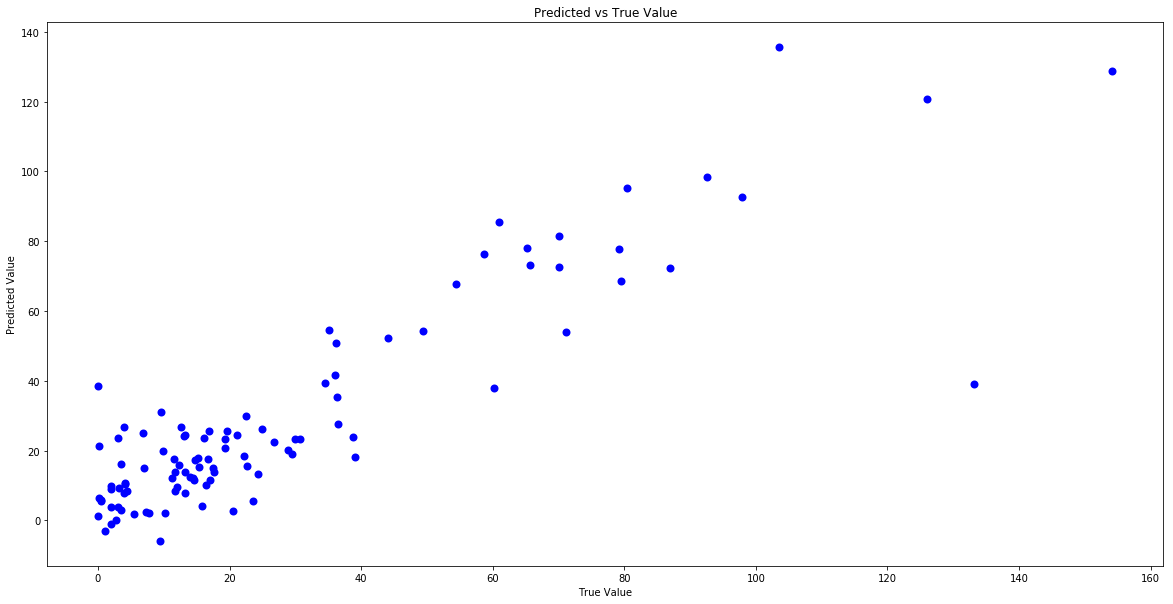

In [61]:
plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, color='blue', linewidth=2)
plt.title('Predicted vs True Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()